### Comparison of Prices through Web scraping

In [1]:
import bs4, requests
import re
import pandas as pd
import numpy as np
import json

from re import sub
from decimal import Decimal

In [2]:
# city of NYC
url='https://www.cargurus.com/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?zip=10100&inventorySearchWidgetType=AUTO&searchId=aa62eb38-5dd0-4d24-8522-badb6a546c98&nonShippableBaseline=396&shopByTypes=MIX&sortDir=ASC&sourceContext=carGurusHomePageModel&distance=50&sortType=DEAL_SCORE&entitySelectingHelper.selectedEntity=d380'
res = requests.get(url)

In [3]:
soup = bs4.BeautifulSoup(res.text)
#print(soup.prettify())

In [4]:
#find data in dictionary format
dataset = soup.find_all("script")
dictionary = []
for data in dataset:
    #print(type(data))
    #print(data)
    if 'PREFLIGHT' in str(data):
        dictionary.append(data)
        #print('found')
        break
             
data_str = str(dictionary)
dict_object = json.loads(re.search('({.+})', data_str).group(0).replace("'", '"'))
print(type(dict_object))
#print(dict_object)

<class 'dict'>


In [5]:
#for key, value in dict_object.items():
    #print(key)

listings = dict_object["listings"]
#print(type(listings))
#print(listings)
output_frame = pd.DataFrame(columns = ['Title','Price','Mileage', 'Year'])
for car in listings:
    year = car['carYear']
    title = car['listingTitle']
    price = car['price']
    mileage = car['mileage']
    output_frame.loc[len(output_frame.index)] = [title, price, mileage, year]
    
output_frame

,Title,Price,Mileage,Year
0,2018 Subaru Outback 3.6R Limited AWD,24988.0,41868,2018
1,2019 Subaru Outback 2.5i Premium AWD,24788.0,9250,2019
2,2018 Subaru Outback 3.6R Touring AWD,27295.0,42245,2018
3,2019 Subaru Outback 2.5i Limited AWD,28592.0,7864,2019
4,2014 Subaru Outback 2.5i Premium,10995.0,114553,2014
5,2018 Subaru Outback 3.6R Touring AWD,28491.0,31663,2018
6,2019 Subaru Outback 2.5i Premium AWD,25791.0,9540,2019
7,2019 Subaru Outback 2.5i Premium AWD,25223.0,12994,2019
8,2019 Subaru Outback 3.6R Limited AWD,28904.0,25011,2019
9,2019 Subaru Outback 2.5i Limited AWD,26827.0,32302,2019


In [6]:
output_frame['Year'] = pd.to_numeric(output_frame['Year'])
output_frame['Price'] = pd.to_numeric(output_frame['Price'])
output_frame['Price'].corr(output_frame['Year'])
output_frame.corr()

,Price,Year
Price,1.000000,0.894372
Year,0.894372,1.000000


In [7]:
#here's where you take over!
#from here you can the analysis on the years and prices from the above data
#Tasks
#    1) develop depreciation curves for the car model of your choice in two cities
#    2) compute the price of a 3-year old car in each city
#    3) Write a report suggesting a plan of action for buying that car

In [8]:
output_frame.sort_values('Year', inplace=True)
output_frame

,Title,Price,Mileage,Year
4,2014 Subaru Outback 2.5i Premium,10995.0,114553,2014
0,2018 Subaru Outback 3.6R Limited AWD,24988.0,41868,2018
2,2018 Subaru Outback 3.6R Touring AWD,27295.0,42245,2018
5,2018 Subaru Outback 3.6R Touring AWD,28491.0,31663,2018
1,2019 Subaru Outback 2.5i Premium AWD,24788.0,9250,2019
3,2019 Subaru Outback 2.5i Limited AWD,28592.0,7864,2019
6,2019 Subaru Outback 2.5i Premium AWD,25791.0,9540,2019
7,2019 Subaru Outback 2.5i Premium AWD,25223.0,12994,2019
8,2019 Subaru Outback 3.6R Limited AWD,28904.0,25011,2019
9,2019 Subaru Outback 2.5i Limited AWD,26827.0,32302,2019


In [9]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Year', ylabel='Price'>

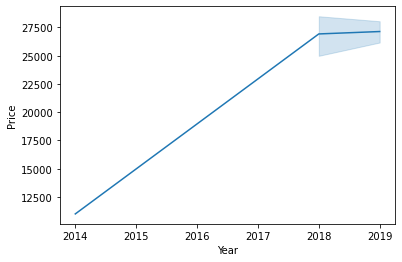

In [10]:
sns.lineplot(data = output_frame, x='Year', y='Price')

In [11]:
output_frame_2 = output_frame[output_frame.Year.isin([2019])]
output_frame_2

,Title,Price,Mileage,Year
1,2019 Subaru Outback 2.5i Premium AWD,24788.0,9250,2019
3,2019 Subaru Outback 2.5i Limited AWD,28592.0,7864,2019
6,2019 Subaru Outback 2.5i Premium AWD,25791.0,9540,2019
7,2019 Subaru Outback 2.5i Premium AWD,25223.0,12994,2019
8,2019 Subaru Outback 3.6R Limited AWD,28904.0,25011,2019
9,2019 Subaru Outback 2.5i Limited AWD,26827.0,32302,2019
10,2019 Subaru Outback 2.5i Limited AWD,28995.0,15081,2019
11,2019 Subaru Outback 2.5i Limited AWD,28592.0,18764,2019
12,2019 Subaru Outback 2.5i Premium AWD,26110.0,10605,2019
13,2019 Subaru Outback 2.5i Limited AWD,28897.0,11696,2019


In [12]:
output_frame_2.Price.mean()

27137.909090909092

In [13]:
output_frame_2.Mileage.mean()

15158.90909090909

In [14]:
# city of Buffalo

In [15]:
url3 = 'https://www.cargurus.com/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?zip=14228&inventorySearchWidgetType=AUTO&searchId=f0896ffa-82df-41f0-800f-2f57d42dca23&nonShippableBaseline=395&shopByTypes=MIX&sortDir=ASC&sourceContext=carGurusHomePageModel&distance=50&sortType=DEAL_SCORE&entitySelectingHelper.selectedEntity=d380'
res = requests.get(url3)

soup = bs4.BeautifulSoup(res.text)

dataset = soup.find_all("script")
dictionary = []
for data in dataset:
    #print(type(data))
    #print(data)
    if 'PREFLIGHT' in str(data):
        dictionary.append(data)
        #print('found')
        break
             
data_str = str(dictionary)
dict_object = json.loads(re.search('({.+})', data_str).group(0).replace("'", '"'))
print(type(dict_object))

listings = dict_object["listings"]
output_frame = pd.DataFrame(columns = ['Title','Price','Mileage', 'Year'])
for car in listings:
    year = car['carYear']
    title = car['listingTitle']
    price = car['price']
    mileage = car['mileage']
    output_frame.loc[len(output_frame.index)] = [title, price, mileage, year]
    
output_frame

output_frame['Year'] = pd.to_numeric(output_frame['Year'])
output_frame['Price'] = pd.to_numeric(output_frame['Price'])
output_frame['Price'].corr(output_frame['Year'])
output_frame.corr()

<class 'dict'>


,Price,Year
Price,1.000000,0.916235
Year,0.916235,1.000000


In [16]:
output_frame.sort_values('Year', inplace=True)
output_frame

,Title,Price,Mileage,Year
11,2010 Subaru Outback 3.6R Limited,11975.0,102867,2010
2,2014 Subaru Outback 2.5i,15200.0,96936,2014
6,2017 Subaru Outback 2.5i Premium AWD,24636.0,36852,2017
0,2018 Subaru Outback 2.5i Limited AWD,28900.0,25583,2018
12,2018 Subaru Outback 2.5i Premium AWD,27319.0,19656,2018
14,2018 Subaru Outback 3.6R Limited AWD,29853.0,51176,2018
1,2019 Subaru Outback 2.5i Premium AWD,28250.0,14752,2019
5,2019 Subaru Outback 2.5i Premium AWD,27463.0,31286,2019
9,2019 Subaru Outback 2.5i Premium AWD,27231.0,31768,2019
13,2019 Subaru Outback 2.5i Premium AWD,27333.0,33816,2019


<AxesSubplot:xlabel='Year', ylabel='Price'>

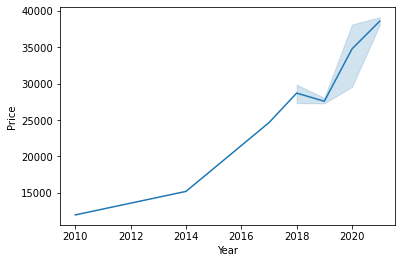

In [17]:
sns.lineplot(data = output_frame, x='Year', y='Price')

In [18]:
output_frame_2 = output_frame[output_frame.Year.isin([2019])]
output_frame_2

,Title,Price,Mileage,Year
1,2019 Subaru Outback 2.5i Premium AWD,28250.0,14752,2019
5,2019 Subaru Outback 2.5i Premium AWD,27463.0,31286,2019
9,2019 Subaru Outback 2.5i Premium AWD,27231.0,31768,2019
13,2019 Subaru Outback 2.5i Premium AWD,27333.0,33816,2019


In [19]:
output_frame_2.Price.mean()

27569.25

In [20]:
output_frame_2.Mileage.mean()

27905.5